# Análise exploratória de dados.

### Importando bibliotecas.

In [1]:
import pandas as pd
from pandas import read_csv
from pandas import set_option

import csv
import numpy as np
import json
import scipy.stats as stats
import statistics as st
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score

### Criando listas com os valores utilizados nos processos.

In [2]:
"""
    Listas utilizadas para obter os nomes
    de acordo com a posição e a escolha do menu de opções.
    Está sendo utilizado para imprimir os valores.
"""
PARAMETROS = ["Batimento Cardiaco", "Pressão Arterial", "Temperatura Corporal"]
EXPLORADOS = ["Média", "Mediana", "Desvio Padrão", "Variancia", "Valor Minimo", "Valor Máximo", "Amplitude", "Coeficiente da Variação", "Escore Z"]

### Metodos.

In [3]:
"""
  Retorna media de dois valores.
"""
def media(valor1,valor2):
    return (valor1+valor2)/2


"""
    Retorna uma matriz com
    cada item da lista obtida.
"""
def distribuirNaMatriz(lista):
    matriz = []
    
    for valor in lista:
        lista_a = []
        lista_a.append(valor)
        matriz.append(lista_a)    
    return matriz

## Leitura dos dados.

In [4]:
print("------------------------------------------------")
print("0 - Leitura dos dados.")
print("\t São 3 tipos de registros a cada hora e por 100 dias.")
print(f"\t\t1 - {PARAMETROS[0]}, 2 - {PARAMETROS[1]}, 3 - {PARAMETROS[2]}.")

------------------------------------------------
0 - Leitura dos dados.
	 São 3 tipos de registros a cada hora e por 100 dias.
		1 - Batimento Cardiaco, 2 - Pressão Arterial, 3 - Temperatura Corporal.


### Abrindo arquivo, e coletando os valores.
#### Definindo o nome do arquivo com os valores registrados.

In [9]:
dados=[]
path = "sinaisvitais003 100dias DV2 RAxxx5.txt"

with open(path,'r',newline='') as ARQUIVO:
    d = csv.reader(ARQUIVO)
    dd=list(d)
    for i in range(0,len(dd)):
        p=dd[i][0]  
        palavras=p.split("\t")
        dados.append({"HORA":palavras[0],"BATIMENTO":palavras[1],"PRESSAO":palavras[2],"TEMPERATURA":palavras[3]}) 

## Coleta
#### Preparação dos dados.

------------------------------------------------
1 - Coleta dos dados.
	Os registros do arquivos estão sendo coletados e separados.


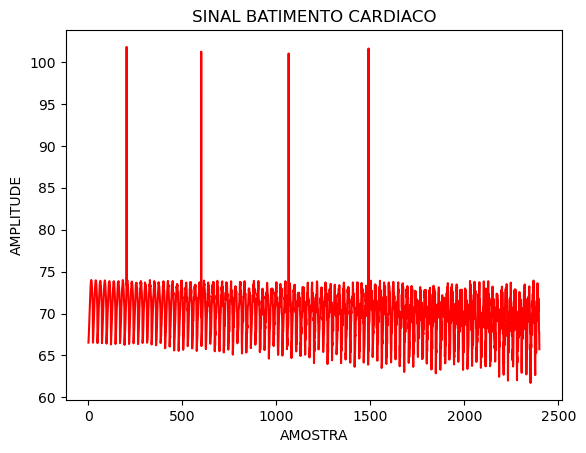

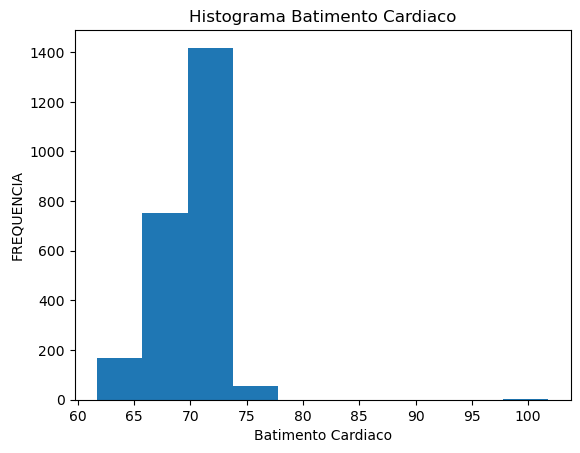

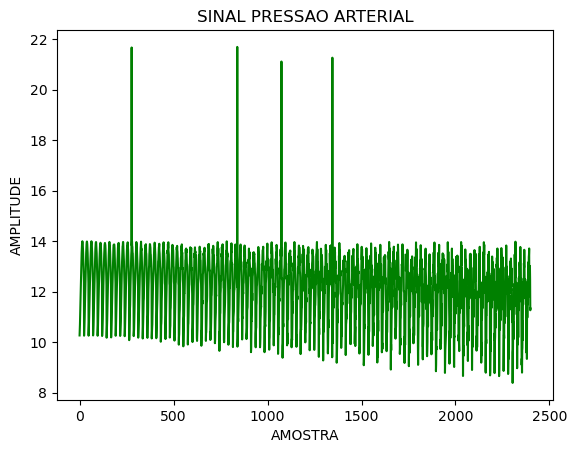

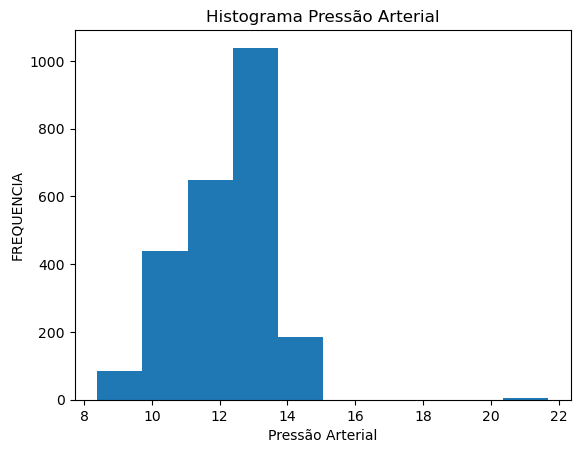

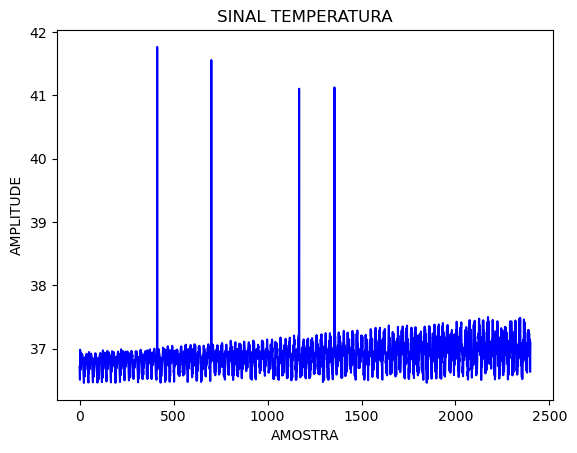

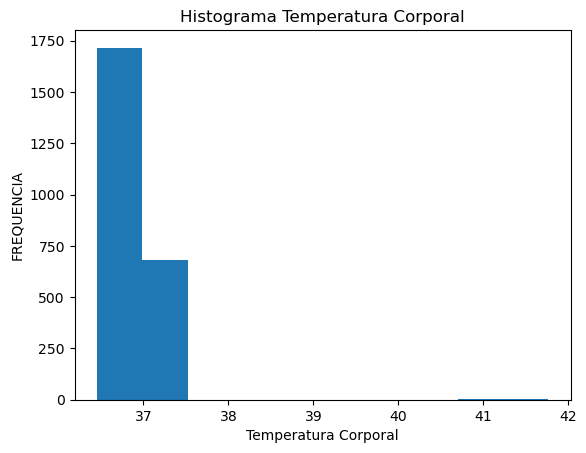

In [10]:
print("------------------------------------------------")
print("1 - Coleta dos dados.") 
print("\tOs registros do arquivos estão sendo coletados e separados.") 
   
## Coleta dos dados. 
hora=[]
batimento=[]
pressao=[]
temperatura=[]

for i in range(0,len(dados)):
    hora.append(dados[i]["HORA"])
    batimento.append(float(dados[i]["BATIMENTO"]))
    pressao.append(float(dados[i]["PRESSAO"]))
    temperatura.append(float(dados[i]["TEMPERATURA"]))

# PLOTAR DADOS
plt.plot(batimento, 'r')
plt.title("SINAL BATIMENTO CARDIACO")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(batimento)
plt.title(f"Histograma {PARAMETROS[0]}")
plt.xlabel(f"{PARAMETROS[0]}")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot(pressao, 'g')
plt.title("SINAL PRESSAO ARTERIAL")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(pressao)
plt.title(f"Histograma {PARAMETROS[1]}")
plt.xlabel(f"{PARAMETROS[1]}")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot(temperatura, 'b')
plt.title("SINAL TEMPERATURA")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(temperatura)
plt.title(f"Histograma {PARAMETROS[2]}")
plt.xlabel(f"{PARAMETROS[2]}")
plt.ylabel("FREQUENCIA")
plt.show()

#### Tratamento dos dados fora da faixa.

------------------------------------------------
2 - Limpeza dos dados.
	Substituindo os ruido pela média dos valores anterior o posterior.

Total de outliers:
	Batimento: 4, amostras [{203: 101.79313372347931}, {600: 101.22615607042525}, {1065: 101.00942676117683}, {1490: 101.60559390529845}]
	Pressão: 4, amostras [{277: 21.673088689426844}, {839: 21.695736831981037}, {1074: 21.11741739983887}, {1345: 21.26930408706747}]
	Temperatura: 4, amostras [{413: 41.76578959875704}, {701: 41.557508369511645}, {1168: 41.10515527054953}, {1356: 41.125415707253154}]


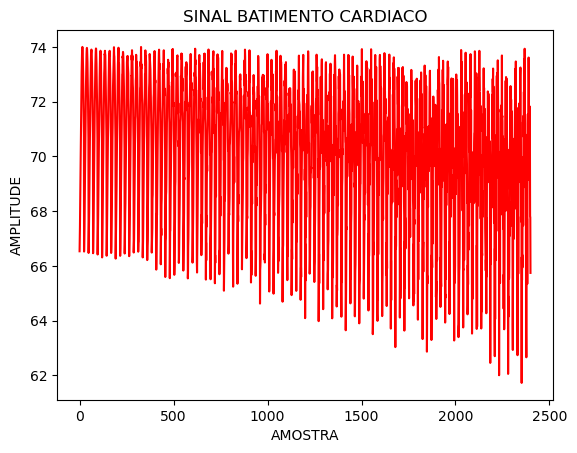

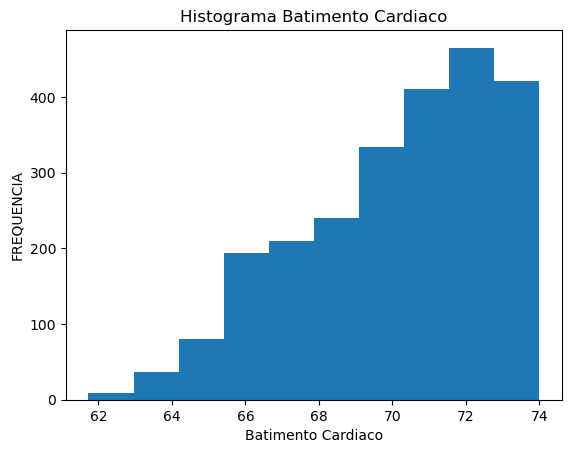

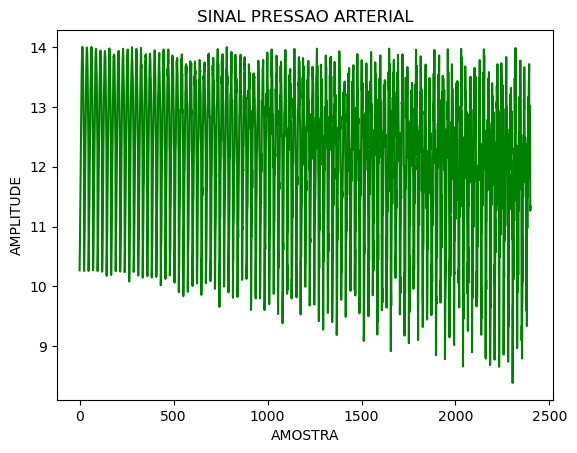

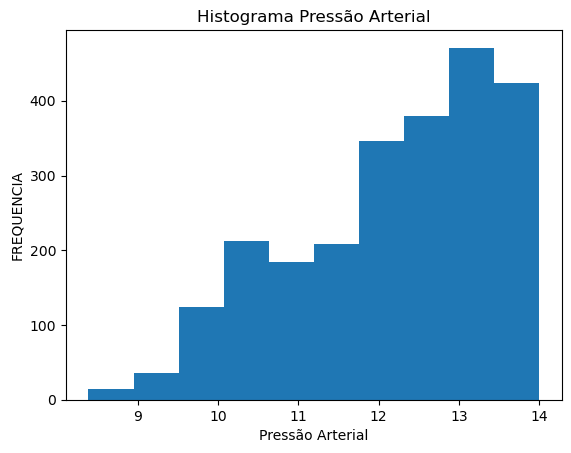

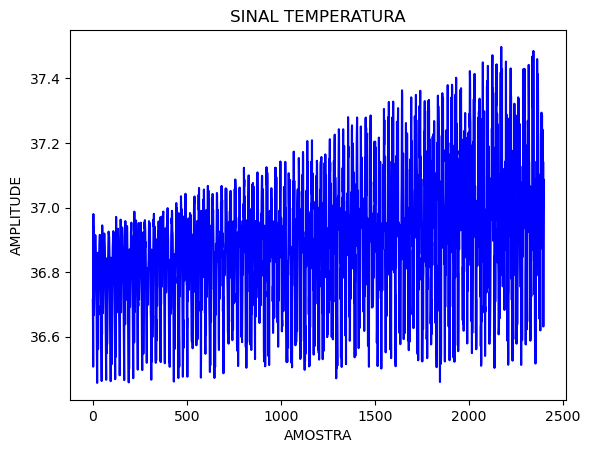

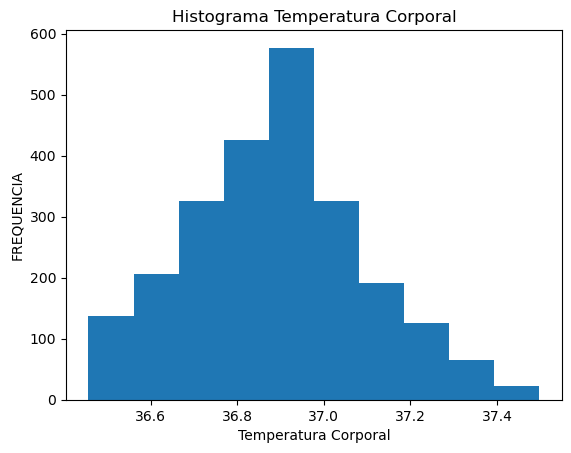

In [11]:
print("------------------------------------------------")
print("2 - Limpeza dos dados.")
print("\tSubstituindo os ruido pela média dos valores anterior o posterior.")
"""
    Exercicio 1.
    Limpeza dos dados
    
    1 - Se batimento é menor que zero OU maior que 100.
    2 - Se Pressão é menor que zero OU maior que 20.
    3 - Se Temperatura é menor que zero OU maior que 40.
    
    Para cada condição com ruido, será subistituido peloa
    média do valor anterio e do próximo.
"""

ruidos_batimento = 0
ruidos_pressao = 0
ruidos_temperatura = 0

dias_batimento = []
dias_pressao = []
dias_temperatura = []

for i in range(len(dados)):
    if (batimento[i] <= 0) or (batimento[i] > 100):
        dias_batimento.append({i:batimento[i]})
        batimento[i]=media(batimento[i-1],batimento[i+1])
        ruidos_batimento += 1
    if (pressao[i] <= 0) or (pressao[i] > 20):
        dias_pressao.append({i:pressao[i]})
        pressao[i]=media(pressao[i-1],pressao[i+1])
        ruidos_pressao += 1
    if (temperatura[i] <= 0) or (temperatura[i] > 40):
        dias_temperatura.append({i:temperatura[i]})
        temperatura[i]=media(temperatura[i-1],temperatura[i+1])
        ruidos_temperatura += 1

print(f"\nTotal de outliers:")
print(f"\tBatimento: {ruidos_batimento}, amostras {dias_batimento}\n\tPressão: {ruidos_pressao}, amostras {dias_pressao}\n\tTemperatura: {ruidos_temperatura}, amostras {dias_temperatura}")

# PLOTAR DADOS
plt.plot( batimento, 'r')
plt.title("SINAL BATIMENTO CARDIACO")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(batimento)
plt.title(f"Histograma {PARAMETROS[0]}")
plt.xlabel(f"{PARAMETROS[0]}")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot( pressao, 'g')
plt.title("SINAL PRESSAO ARTERIAL")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(pressao)
plt.title(f"Histograma {PARAMETROS[1]}")
plt.xlabel(f"{PARAMETROS[1]}")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot( temperatura, 'b')
plt.title("SINAL TEMPERATURA")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(temperatura)
plt.title(f"Histograma {PARAMETROS[2]}")
plt.xlabel(f"{PARAMETROS[2]}")
plt.ylabel("FREQUENCIA")
plt.show()

In [15]:
# ORGANIZANDO UM DATAFAME COM OS DADOS DISPONIBILIZADOS NO ARQUIVO   
auxDF=[]  
auxDF+=[(batimento[j], pressao[j], temperatura[j]) for j in range(100)]  
DFdados = pd.DataFrame(auxDF, columns=[PARAMETROS[0],PARAMETROS[1],PARAMETROS[2]])

# FERRAMENTA GERAL
print("\nDADOS ESTATISTICOS BÁSICOS - TEMPORAL - POR HORA: ")
print("NUMERO DE AMOSTRAS/CAMPOS: ",DFdados.shape)


DADOS ESTATISTICOS BÁSICOS - TEMPORAL - POR HORA: 
NUMERO DE AMOSTRAS/CAMPOS:  (100, 3)


#### Dados do DadaFrame com as amostras;

In [16]:
DFdados

,Batimento Cardiaco,Pressão Arterial,Temperatura Corporal
0,66.535898,10.267949,36.714259
1,66.935822,10.467911,36.635056
2,67.428850,10.714425,36.506828
3,68.000000,11.000000,36.979759
4,68.631919,11.315960,36.677503
...,...,...,...
95,70.625468,12.306296,36.461791
96,66.418775,10.256365,36.574060
97,66.851518,10.412917,36.844450
98,67.337589,10.640939,36.817614


#### Dados estatisticos do DadaFrame com as amostras;

In [17]:
# Avaliar código.

# dados = DFdados.describe()
# #print(dados)
# for i in dados.items():
#     print("\n", i)

In [18]:
DFdados.describe()

,Batimento Cardiaco,Pressão Arterial,Temperatura Corporal
count,100.000000,100.000000,100.000000
mean,71.151372,12.579703,36.761657
std,2.468810,1.235526,0.138314
min,66.418775,10.256365,36.456422
25%,69.227413,11.629365,36.670329
50%,71.963462,12.973132,36.793689
75%,73.389800,13.697876,36.878793
max,74.000000,14.000000,36.979759


#### Organizando os dados em 24 amostra por dia.

In [19]:
print("------------------------------------------------")
print("3 - Tratamento dos dados.")
print("\tOrcanizando os dados em listas, incluindo a cada 24h Uma nova lista.")
"""
    Separando os dias por dias
    contendo os registros das 24 horas.
"""
matriz_batimento = []
lista_b24 = []

matriz_pressao = []
lista_p24 = []

matriz_temperatura= []
lista_t24 = []


h = 0
# Percorrendo a quantidade de registro do arquivo.
for i in range(len(dados)):
    
    # Incluindo os registros no dia i
    lista_b24.append(batimento[i])
    lista_p24.append(pressao[i])
    lista_t24.append(temperatura[i])
    
    # Hora atual recebe ela mesma mais 1.
    # referente a hora do registro.
    h += 1
    
    # Se a hora atual for igual 24. Então
    if(h == 24):
        
        # Incluindo a lista com os 24 registros. Na posição dia i.
        matriz_batimento.append(lista_b24)
        matriz_pressao.append(lista_p24)
        matriz_temperatura.append(lista_t24)
        
        # lista a lista com os registros do dia i.
        lista_b24 = []
        lista_p24 = []
        lista_t24 = []
        
        # Zera a hora, para iniciar o proximo dia.
        h = 0

# Criando uma matriz com os dia, e contendos as 24 amostras.
matriz_master = []
matriz_master.append(matriz_batimento)
matriz_master.append(matriz_pressao)
matriz_master.append(matriz_temperatura)

"""
 matriz_master[A][B][C]
 A - os parâmetros coletados.
 B - são os dias que fotam coletados, de 1 até 100.
 C - são as horas do dia. de 1 até 24.
"""

------------------------------------------------
3 - Tratamento dos dados.
	Orcanizando os dados em listas, incluindo a cada 24h Uma nova lista.


'\n matriz_master[A][B][C]\n A - os parâmetros coletados.\n B - são os dias que fotam coletados, de 1 até 100.\n C - são as horas do dia. de 1 até 24.\n'

#### Exibindos dados referente ao dia selecioando.


DADOS ESTATISTICOS BÁSICOS - TEMPORAL - POR HORA: 
NUMERO DE AMOSTRAS/CAMPOS DO DIA 80:  (24, 3)


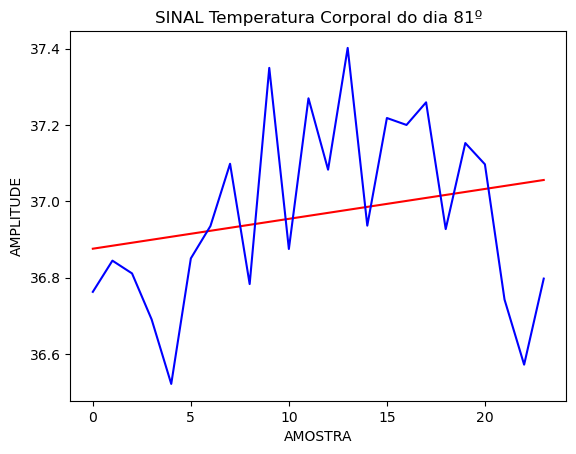

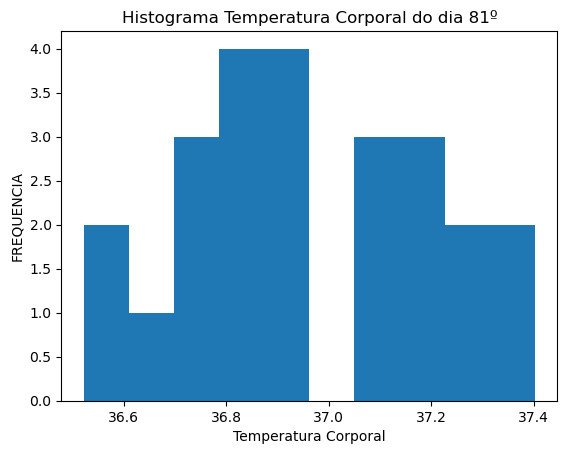

In [51]:
dia = 81

# ORGANIZANDO UM DATAFAME COM OS DADOS DISPONIBILIZADOS NO ARQUIVO   
auxDF=[]  
auxDF+=[(matriz_master[0][dia-1][j],matriz_master[1][dia-1][j],matriz_master[2][dia-1][j]) for j in range(24)]  
DFdados = pd.DataFrame(auxDF, columns=[PARAMETROS[0],PARAMETROS[1],PARAMETROS[2]])

# FERRAMENTA GERAL
print("\nDADOS ESTATISTICOS BÁSICOS - TEMPORAL - POR HORA: ")
print(f"NUMERO DE AMOSTRAS/CAMPOS DO DIA {dia-1}: ",DFdados.shape)

hora = 24
horas = []
for i in range(hora): horas.append(i)

regressao = linear_model.LinearRegression()
horas_d = np.array(distribuirNaMatriz(horas))
valores =np.array(distribuirNaMatriz(DFdados[PARAMETROS[2]]))
regressao.fit(horas_d,valores)
plt.plot(horas_d, horas_d*regressao.coef_[0][0] + regressao.intercept_, color='red')
        
plt.plot(DFdados[PARAMETROS[2]], 'b')
plt.title(f"SINAL {PARAMETROS[2]} do dia {dia}º")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(DFdados[PARAMETROS[2]])
plt.title(f"Histograma {PARAMETROS[2]} do dia {dia}º")
plt.xlabel(f"{PARAMETROS[2]}")
plt.ylabel("FREQUENCIA")
plt.show()

#### Dados diário.

In [21]:
DFdados

,Batimento Cardiaco,Pressão Arterial,Temperatura Corporal
0,64.093909,10.212976,36.998412
1,66.799217,9.993018,36.970400
2,65.468017,10.338228,36.549255
3,67.745189,10.395968,36.722962
4,67.051454,11.223721,36.528672
5,68.713236,10.782261,36.801920
6,67.785821,11.764487,36.754603
7,69.457192,11.601914,36.791085
8,70.511159,12.521675,36.879796
9,71.945730,12.818880,37.055091


#### Dados estatísticos diário.

In [22]:
DFdados.describe()

,Batimento Cardiaco,Pressão Arterial,Temperatura Corporal
count,24.000000,24.000000,24.000000
mean,70.046735,12.282738,36.878510
std,2.617939,1.226213,0.198152
min,64.093909,9.993018,36.528672
25%,68.416494,11.507366,36.734634
50%,70.487742,12.597498,36.884727
75%,72.036840,13.317221,37.041750
max,73.840041,13.767240,37.156504


### Extraindo os dados.

------------------------------------------------
4 - Mineração dos dados.
	Extraindo os valores dos dados coletados.
------------------------------------------------


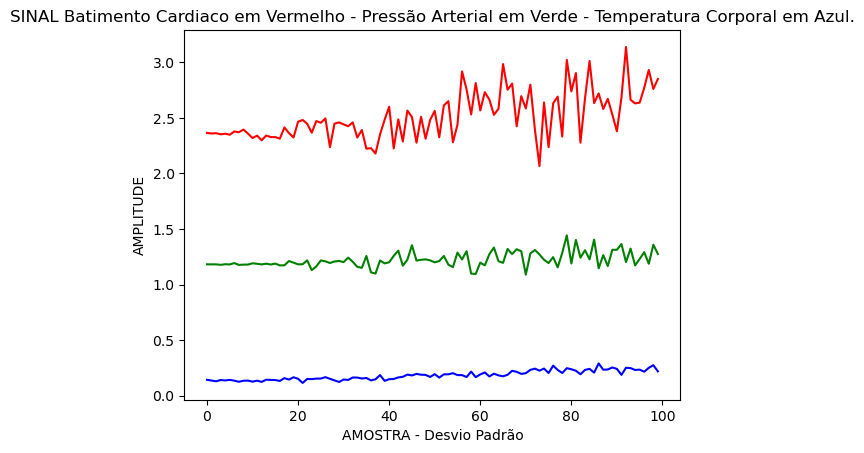

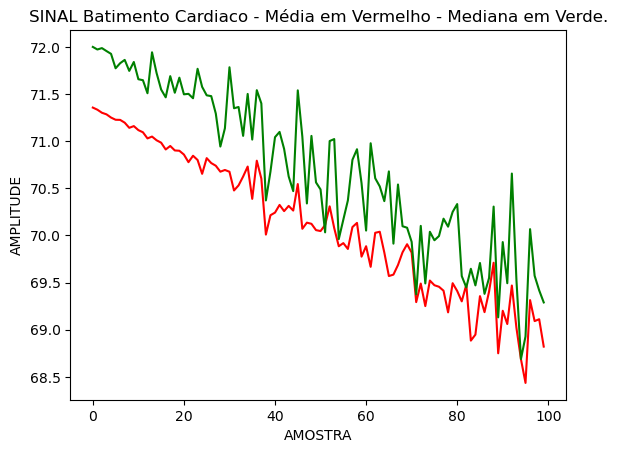

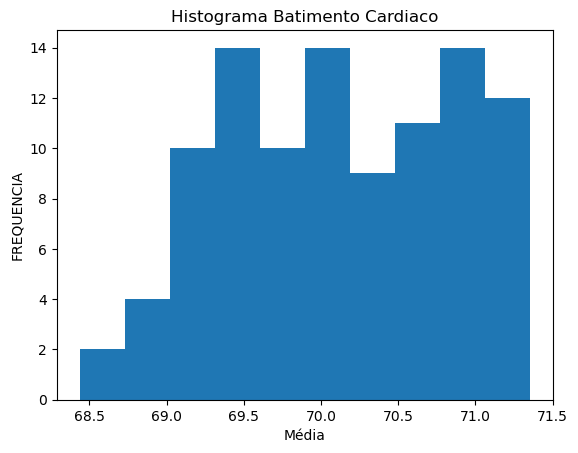

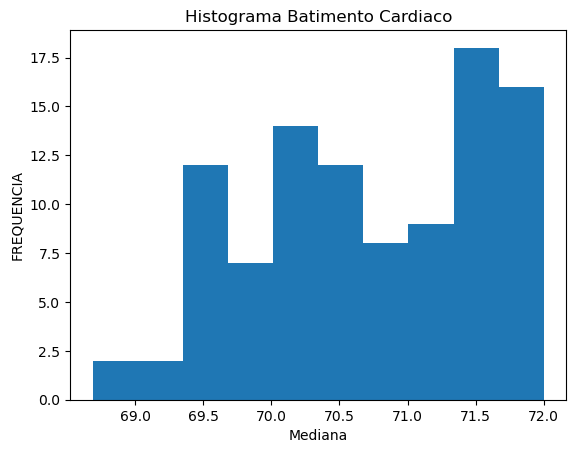

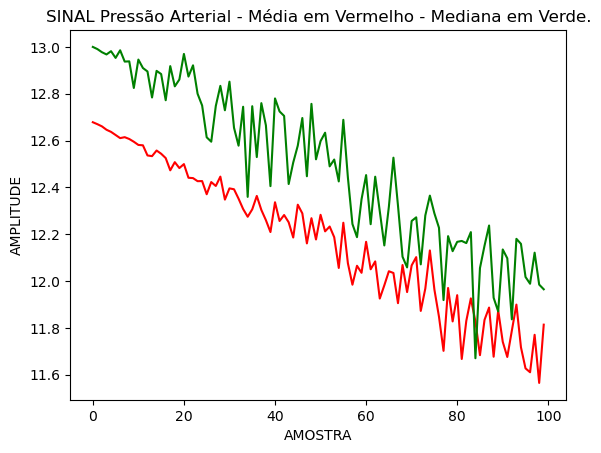

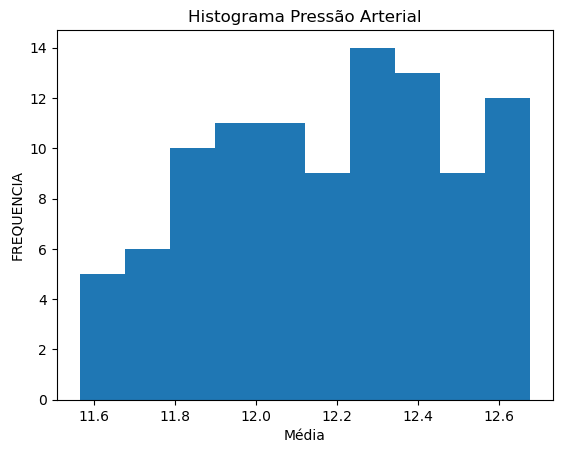

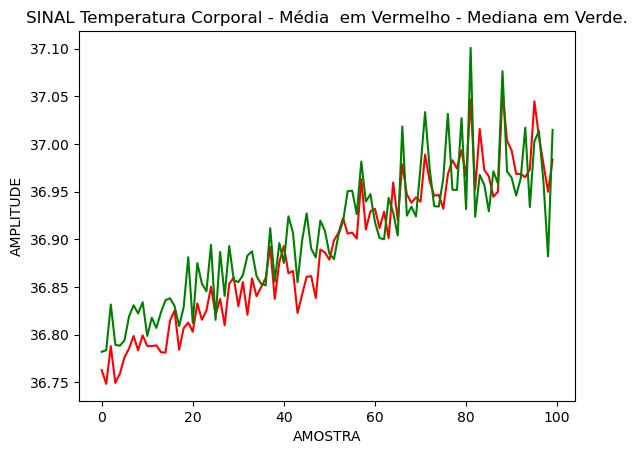

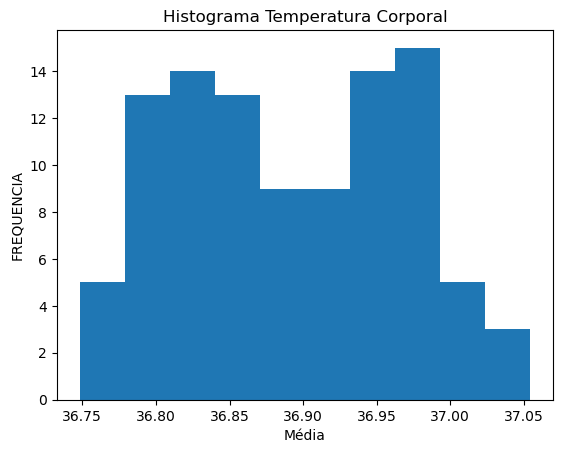

In [49]:
print("------------------------------------------------")
print("4 - Mineração dos dados.")
print("\tExtraindo os valores dos dados coletados.")
"""
    Extraindo os seguintes valores.
        1 - Média de cada dia.
        2 - Médiana de cada dia.
        3 - Desvio Padrão.
        4 - Variancia.
        5 - amplitude
"""
u = 1

dados_extraidos = []
dados_batimento = []
dados_pressao = []
dados_temperatura = []

# listas para os dados extraidos do batimento.
dados_m_b = []
dados_md_b = []
dados_dp_b = []
dados_v_b = []
dados_min_b = []
dados_max_b = []
dados_amp_b = []
dados_cv_b = []
dados_zsc_b = []

# listas para os dados extraidos da pressão.
dados_m_p = []
dados_md_p = []
dados_dp_p = []
dados_v_p = []
dados_min_p = []
dados_max_p = []
dados_amp_p = []
dados_cv_p = []
dados_zsc_p = []

# listas para os dados extraidos da temperatura.
dados_m_t = []
dados_md_t = []
dados_dp_t = []
dados_v_t = []
dados_min_t = []
dados_max_t = []
dados_amp_t = []
dados_cv_t = []
dados_zsc_t = []

for a in range(100):
    
    # Valores de cada parametros coletados.
    b = matriz_master[0][a]
    p = matriz_master[1][a]
    t = matriz_master[2][a]
    
    # Obtendo os valores do batimento, e incluindo nas listas definidas.
    dados_m_b.append(np.average(b))
    dados_md_b.append(np.median(b))
    dados_dp_b.append(np.std(b))
    dados_v_b.append(np.var(b))
    dados_min_b.append(min(b))
    dados_max_b.append(max(b))
    dados_amp_b.append((max(b) - min(b)))
    dados_cv_b.append((np.std(b) / np.average(b)))
    dados_zsc_b.append(stats.zscore(b))
    
    # Obtendo os valores da pressão, e incluindo nas listas definidas.
    dados_m_p.append(np.average(p))
    dados_md_p.append(np.median(p))
    dados_dp_p.append(np.std(p))
    dados_v_p.append(np.var(p))
    dados_min_p.append(min(p))
    dados_max_p.append(max(p))
    dados_amp_p.append((max(p) - min(p)))
    dados_cv_p.append((np.std(p) / np.average(p)))
    dados_zsc_p.append(stats.zscore(p))
    
    # Obtendo os valores da temperatura, e incluindo nas listas definidas.
    dados_m_t.append(np.average(t))
    dados_md_t.append(np.median(t))
    dados_dp_t.append(np.std(t))
    dados_v_t.append(np.var(t))
    dados_min_t.append(min(t))
    dados_max_t.append(max(t))
    dados_amp_t.append((max(t) - min(t)))
    dados_cv_t.append((np.std(t) / np.average(t)))
    dados_zsc_t.append(stats.zscore(t))
    
    u += 1

# Incluindos as listas dos valores extridos, e incluindo na lista do Batimento.
dados_batimento.append(dados_m_b)
dados_batimento.append(dados_md_b)
dados_batimento.append(dados_dp_b)
dados_batimento.append(dados_v_b)
dados_batimento.append(dados_min_b)
dados_batimento.append(dados_max_b)
dados_batimento.append(dados_amp_b)
dados_batimento.append(dados_cv_b)
dados_batimento.append(dados_zsc_b)

# Incluindos as listas dos valores extridos, e incluindo na lista do Pressão.
dados_pressao.append(dados_m_p)
dados_pressao.append(dados_md_p)
dados_pressao.append(dados_dp_p)
dados_pressao.append(dados_v_p)
dados_pressao.append(dados_min_p)
dados_pressao.append(dados_max_p)
dados_pressao.append(dados_amp_p)
dados_pressao.append(dados_cv_p)
dados_pressao.append(dados_zsc_p)

# Incluindos as listas dos valores extridos, e incluindo na lista da Temperatura.
dados_temperatura.append(dados_m_t)
dados_temperatura.append(dados_md_t)
dados_temperatura.append(dados_dp_t)
dados_temperatura.append(dados_v_t)
dados_temperatura.append(dados_min_t)
dados_temperatura.append(dados_max_t)
dados_temperatura.append(dados_amp_t)
dados_temperatura.append(dados_cv_t)
dados_temperatura.append(dados_zsc_t)

# Incluindo na matriz, as três listas, contendo suas listas de valores extraidos.
dados_extraidos.append(dados_batimento)
dados_extraidos.append(dados_pressao)
dados_extraidos.append(dados_temperatura)

"""
Os valores extraidos estão
com a seguinte estrutura:

dados_extraidos[A][B][C]

A - São os Atributos.
    0 - Batimento.
    1 - Pressao.
    2 - Temperatura.

B - São os dados extraiso.
    0 - Media
    1 - Mediana.
    2 - Desvio Padrão.
    3 - Variancia
    4 - Valor Minimo.
    5 - Valor maximo.
    6 - Amplitute.
    7 - Coeficiente da Variação.
    8 - Escore Z

C - É o valor referente ao dia.
    0 - primeiro dia.
    ...
    99 - último dia.
"""
print("------------------------------------------------")



batimentoMedia = dados_extraidos[0][0]
batimentoMediana = dados_extraidos[0][1]

pressaoMedia = dados_extraidos[1][0]
temperaturaMedia = dados_extraidos[2][0]

plt.plot( dados_extraidos[0][2], 'r')
plt.plot( dados_extraidos[1][2], 'g')
plt.plot( dados_extraidos[2][2], 'b')
plt.title(f"SINAL {PARAMETROS[0]} em Vermelho - {PARAMETROS[1]} em Verde - {PARAMETROS[2]} em Azul.")
plt.xlabel(f"AMOSTRA - {EXPLORADOS[2]}")
plt.ylabel("AMPLITUDE")
plt.show()

plt.plot( batimentoMedia, 'r')
plt.plot( batimentoMediana, 'g')
plt.title(f"SINAL {PARAMETROS[0]} - {EXPLORADOS[0]} em Vermelho - {EXPLORADOS[1]} em Verde.")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(batimentoMedia)
plt.title(f"Histograma {PARAMETROS[0]}")
plt.xlabel(f"{EXPLORADOS[0]}")
plt.ylabel("FREQUENCIA")
plt.show()

plt.hist(batimentoMediana)
plt.title(f"Histograma {PARAMETROS[0]}")
plt.xlabel(f"{EXPLORADOS[1]}")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot( pressaoMedia, 'r')
plt.plot( dados_extraidos[1][1], 'g')
plt.title(f"SINAL {PARAMETROS[1]} - {EXPLORADOS[0]} em Vermelho - {EXPLORADOS[1]} em Verde.")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(pressaoMedia)
plt.title(f"Histograma {PARAMETROS[1]}")
plt.xlabel(f"{EXPLORADOS[0]}")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot( temperaturaMedia, 'r')
plt.plot( dados_extraidos[2][1], 'g')
plt.title(f"SINAL {PARAMETROS[2]} - {EXPLORADOS[0]}  em Vermelho - {EXPLORADOS[1]} em Verde.")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

plt.hist(temperaturaMedia)
plt.title(f"Histograma {PARAMETROS[2]}")
plt.xlabel(f"{EXPLORADOS[0]}")
plt.ylabel("FREQUENCIA")
plt.show()

#### Obtendo valor do dados extraido selecionado e do dia selecionado.

In [26]:
print("***********************")
dia = int(input("Digite o dia desejado? "))
print("***********************")
print(f"1 - {EXPLORADOS[0]}\n2 - {EXPLORADOS[1]}\n3 - {EXPLORADOS[2]}\n4 - {EXPLORADOS[3]}\n5 - {EXPLORADOS[4]}\n6 - {EXPLORADOS[5]}\n7 - {EXPLORADOS[6]}")
print("***********************")
valor = int(input("Digite o valor desejado? "))

# ORGANIZANDO UM DATAFAME COM OS DADOS DISPONIBILIZADOS NO ARQUIVO   
auxDF=[]  
auxDF+=[(dados_extraidos[0][valor-1][dia-1],dados_extraidos[1][valor-1][dia-1],dados_extraidos[2][valor-1][dia-1])]  
DFdados = pd.DataFrame(auxDF, columns=[PARAMETROS[0],PARAMETROS[1],PARAMETROS[2]])

# FERRAMENTA GERAL
print(f"\n{EXPLORADOS[valor]} do dia {dia-1}")
print(f"NUMERO DE AMOSTRAS/CAMPOS DO: ",DFdados.shape)

***********************
Digite o dia desejado? 91
***********************
1 - Média
2 - Mediana
3 - Desvio Padrão
4 - Variancia
5 - Valor Minimo
6 - Valor Máximo
7 - Amplitude
***********************
Digite o valor desejado? 1

Mediana do dia 90
NUMERO DE AMOSTRAS/CAMPOS DO:  (1, 3)


#### Dados do valor extradido estatisticos escolhido e dia escolhido.

In [27]:
DFdados

,Batimento Cardiaco,Pressão Arterial,Temperatura Corporal
0,69.201177,11.740405,36.993281


## Correlação 

#### Preparação dos dados da correlação diária.

In [35]:
CORBATIMENTO_BATIMENTO = []
CORBATIMENTO_PRESSAO = []
CORBATIMENTO_TEMPERATURA = []

BATIMENTO = []

for i in range(100):
    PauxDF=[]  
    PauxDF+=[(matriz_master[0][i][j],matriz_master[1][i][j],matriz_master[2][i][j]) for j in range(24)]  
    PDFdados = pd.DataFrame(PauxDF, columns=["BATIMENTO","PRESSAO","TEMPERATURA"])
    
    # CALCULAR A CORRELAÇÃO
    correlacao = PDFdados.corr(method='pearson')

    #SALVANDO CORRELACAO BATIMENTO x OUTROS
    CORBATIMENTO_BATIMENTO.append(correlacao["BATIMENTO"][0])
    CORBATIMENTO_PRESSAO.append(correlacao["PRESSAO"][0])
    CORBATIMENTO_TEMPERATURA.append(correlacao["TEMPERATURA"][0])
    BATIMENTO.append(PDFdados["BATIMENTO"])


DADOS ESTATISTICOS BÁSICOS - TEMPORAL - POR HORA: 
NUMERO DE AMOSTRAS/CAMPOS:  (100, 3)


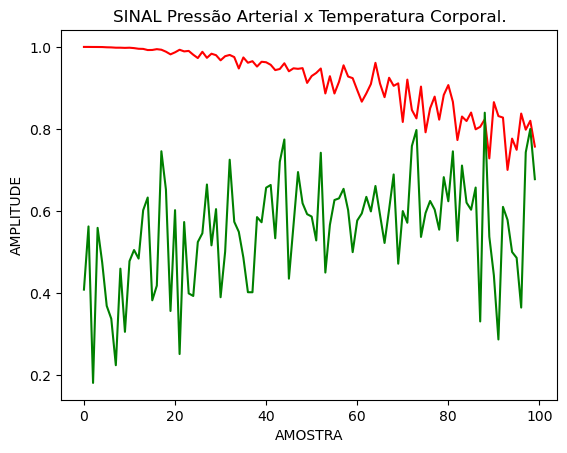

In [36]:
# ORGANIZANDO UM DATAFAME COM OS DADOS DISPONIBILIZADOS NO ARQUIVO   
auxDF=[]  
auxDF+=[(CORBATIMENTO_BATIMENTO[j],CORBATIMENTO_PRESSAO[j], CORBATIMENTO_TEMPERATURA[j]) for j in range(100)]  
DFdados = pd.DataFrame(auxDF, columns=[PARAMETROS[0], PARAMETROS[1],PARAMETROS[2]])

# FERRAMENTA GERAL
print("\nDADOS ESTATISTICOS BÁSICOS - TEMPORAL - POR HORA: ")
print("NUMERO DE AMOSTRAS/CAMPOS: ",DFdados.shape)

plt.plot( DFdados[PARAMETROS[1]], 'r')
plt.plot( DFdados[PARAMETROS[2]], 'g')
plt.title(f"SINAL {PARAMETROS[1]} x {PARAMETROS[2]}.")
plt.xlabel("AMOSTRA")
plt.ylabel("AMPLITUDE")
plt.show()

#### Tabela da Correlação dos valores de cada dia.

In [37]:
DFdados

,Batimento Cardiaco,Pressão Arterial,Temperatura Corporal
0,1.0,1.000000,0.408096
1,1.0,0.999983,0.562201
2,1.0,0.999855,0.180514
3,1.0,0.999815,0.558711
4,1.0,0.999693,0.474752
...,...,...,...
95,1.0,0.749089,0.485575
96,1.0,0.837523,0.364283
97,1.0,0.798119,0.742953
98,1.0,0.819865,0.799904


### Amplitude da correlação

In [32]:
# Lista que receberá a amplitude dos valores.
AMPLITUDE = []
for i in range(100):
    x = CORBATIMENTO_PRESSAO[i] - CORBATIMENTO_TEMPERATURA[i]
    AMPLITUDE.append(x)

#### Dados da Amplitude.

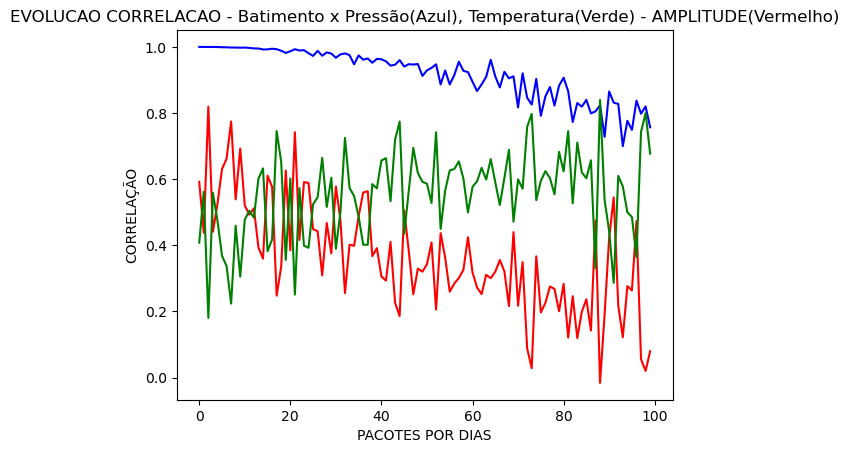

In [38]:
# Plotando a correlação.
plt.plot(AMPLITUDE,'r')
plt.plot(CORBATIMENTO_PRESSAO,'b')
plt.plot(CORBATIMENTO_TEMPERATURA,'g')
plt.title("EVOLUCAO CORRELACAO - Batimento x Pressão(Azul), Temperatura(Verde) - AMPLITUDE(Vermelho)")
plt.xlabel("PACOTES POR DIAS")
plt.ylabel("CORRELAÇÃO")
plt.show()

### A correlação 

In [39]:
print("5 - Análise de conteúdo.")
print("\tCorrelação entre os três parâmetros.")

v = []
for i in range(100):
    auxDF=[]
    auxDF+=[(float(matriz_master[0][i][j]),float(matriz_master[1][i][j]),float(matriz_master[2][i][j])) for j in range(0,24)]
    DataFrame=[]
    # MONTAGEM
    DataFrame = pd.DataFrame(auxDF,columns=[PARAMETROS[0], PARAMETROS[1], PARAMETROS[2]])

    v.append(DataFrame.corr(method='pearson'))
print("------------------------------------------------")

5 - Análise de conteúdo.
	Correlação entre os três parâmetros.
------------------------------------------------


### Correlação dos três parâmetros referente ao dia definido.
#### Enquanto for Verdadeiro irá executar. 



	*************** Menu de opções  ***************
	**	Digite o dia desejado (de 1 até 100)? 11
	***** *************************************** *****


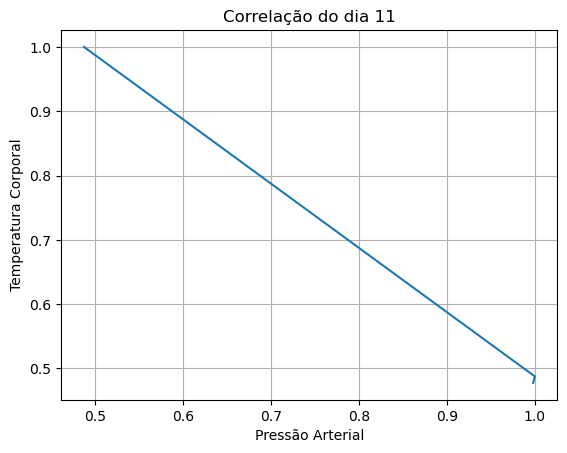



	*************** Opções de sair.  ***************
	**	Deseja continuar?
	**	S - SIM, N - NÃO? n
	***** ************************************ *****


In [40]:
while True:
    try:
        print("\n\n\t*************** Menu de opções  ***************")
        dia = int(input("\t**\tDigite o dia desejado (de 1 até 100)? "))
        
    except ValueError:
        print("\t**\tERRO - Valor fora do padrão, digite um valor número inteiro.")
    
    
    if((dia > 0) and (dia <= 100)):
        print("\t***** *************************************** *****")
        auxDF=[]
        auxDF+=[(float(matriz_master[0][dia-1][j]), float(matriz_master[1][dia-1][j]), float(matriz_master[2][dia-1][j])) for j in range(0,24)]
        DataFrame=[]
        # MONTAGEM
        DataFrame = pd.DataFrame(auxDF,columns=[PARAMETROS[0], PARAMETROS[1], PARAMETROS[2]])
    
    
        x = DataFrame.corr(method='pearson')[PARAMETROS[1]]
        y = DataFrame.corr(method='pearson')[PARAMETROS[2]]
    
        plt.plot(x, y)
        plt.title(f"Correlação do dia {dia}")
        plt.xlabel(PARAMETROS[1])
        plt.ylabel(PARAMETROS[2])
        plt.grid()
        plt.show()
        
        print("\n\n\t*************** Opções de sair.  ***************")
        opcao_p = input("\t**\tDeseja continuar?\n\t**\tS - SIM, N - NÃO? ")
        print("\t***** ************************************ *****")
        
        if((opcao_p == "N") or (opcao_p == "n")):
            break
    else:
        print("\t**\tOPÇÃO INVÁLIDA. TENTE NOVAMENTE!")

### Avaliando a Correlação dos Três parâmetros.
#### Batimento - Pressão - Temperatura.

In [41]:
print("------------------------------------------------")
print("\tCorrelação entre os três parâmetros.")

batimento = []
pressao = []
temperatura = []

for i in matriz_master[0]:
    for u in i:
        batimento.append(u)
for i in matriz_master[1]:
    for u in i:
        pressao.append(u)
for i in matriz_master[2]:
    for u in i:
        temperatura.append(u)

auxDF=[]
auxDF+=[(float(batimento[j]), float(pressao[j]), float(temperatura[j])) for j in range(0,100)]
DataFrame=[]

# MONTAGEM
DataFrame = pd.DataFrame(auxDF,columns=[PARAMETROS[0], PARAMETROS[1], PARAMETROS[2]])
# print(DataFrame.corr(method='pearson'))   


x = DataFrame.corr(method='pearson')


itens=[]

for i in x:
    itens.append(i)
    st=x[i]
    sst=[]
    for j in range(len(st)):
        sst.append(str(st[j])+" ")

# p posição do indece.
# i valor do indece.
for p , i in enumerate(x):
    # print("--")
    
    st=x[i]
    for j in range(p, len(st)):
        # print("-")
        #print(a) 
        if(p != j):
            if (st[j] >= 0.8):
                print(f"O ",itens[p]," E ",itens[j],"APRESENTA ALTA CORRELAÇÃO, PROPOR ALGO.")
            elif((st[j] >= 0.5) and (st[j] < 0.8)):
                print(f"O ",itens[p]," E ",itens[j],"APRESENTA ALGUMA CORRELAÇÃO, PROPOR DIVULGAÇÃO")
            else:
                print(f"O ",itens[p]," E ",itens[j],"APRESENTA BAIXA CORRELAÇÃO, AVALIAR POSSIBILIDADES.")
print("------------------------------------------------")

------------------------------------------------
	Correlação entre os três parâmetros.
O  Batimento Cardiaco  E  Pressão Arterial APRESENTA ALTA CORRELAÇÃO, PROPOR ALGO.
O  Batimento Cardiaco  E  Temperatura Corporal APRESENTA BAIXA CORRELAÇÃO, AVALIAR POSSIBILIDADES.
O  Pressão Arterial  E  Temperatura Corporal APRESENTA BAIXA CORRELAÇÃO, AVALIAR POSSIBILIDADES.
------------------------------------------------


### Avaliando a correlação entre os valores extraidos do Batimento.

In [42]:
print("------------------------------------------------")
print("\tCorrelação entre os dados extraidos dos três parâmetros.")
auxDF=[]
auxDF+=[(float(dados_extraidos[0][0][j]), float(dados_extraidos[0][1][j]), float(dados_extraidos[0][2][j]), float(dados_extraidos[0][3][j]), float(dados_extraidos[0][4][j]), float(dados_extraidos[0][5][j]), float(dados_extraidos[0][6][j])) for j in range(0,24)]
DataFrame=[]
# MONTAGEM
DataFrame = pd.DataFrame(auxDF,columns=[EXPLORADOS[0], EXPLORADOS[1], EXPLORADOS[2], EXPLORADOS[3], EXPLORADOS[4], EXPLORADOS[5], EXPLORADOS[6]])
print(DataFrame.corr()) 

x = DataFrame.corr(method='pearson')

itens=[]

for i in x:
    #print("PARÂMETRO: ",i)
    itens.append(i)
    st=x[i]
    sst=[]
    for j in range(len(st)):
        sst.append(str(st[j])+" ")

# p posição do indece.
# i valor do indece.
for p , i in enumerate(x):
    # print("--")
    
    st=x[i]
    for j in range(p,len(st)):
#         print("-")
        #print(a) 
        if(p != j):
            if (st[j] >= 0.8):
                print(f"{PARAMETROS[0]} - ",itens[p]," E ",itens[j]," APRESENTA ALTA CORRELAÇÃO, Atenção.")
                
            elif(st[j] >= 0.5) and (st[j] < 0.8):
                print(f"{PARAMETROS[0]} - ",itens[p]," E ",itens[j]," APRESENTA ALGUMA CORRELAÇÃO, Propor algo.")
            else:
                print(f"{PARAMETROS[0]} - ",itens[p]," E ",itens[j]," APRESENTA BAIXA CORRELAÇÃO, Avaliar.")


------------------------------------------------
	Correlação entre os dados extraidos dos três parâmetros.
                  Média   Mediana  Desvio Padrão  Variancia  Valor Minimo  \
Média          1.000000  0.812420      -0.332304  -0.338417      0.753854   
Mediana        0.812420  1.000000      -0.208974  -0.216750      0.512197   
Desvio Padrão -0.332304 -0.208974       1.000000   0.999935     -0.579424   
Variancia     -0.338417 -0.216750       0.999935   1.000000     -0.582526   
Valor Minimo   0.753854  0.512197      -0.579424  -0.582526      1.000000   
Valor Máximo   0.581549  0.419647       0.103294   0.098678      0.506569   
Amplitude     -0.562120 -0.368812       0.726372   0.727495     -0.887325   

               Valor Máximo  Amplitude  
Média              0.581549  -0.562120  
Mediana            0.419647  -0.368812  
Desvio Padrão      0.103294   0.726372  
Variancia          0.098678   0.727495  
Valor Minimo       0.506569  -0.887325  
Valor Máximo       1.000000  -

### Exibindo os graficos para analise, obtendo o perfil da curva, e Histograma.
#### Enquanto for Verdadeiro irá executar. 



	*************** Menu de opções  ***************

	**	1 - Batimento.
	**	2 - Pressão
	**	3 - Temperatura

	**	Qual sua opção? 3


	***************

	**	1 - Média.
	**	2 - Mediana
	**	3 - Desvio Padrão.
	**	4 - Variancia.
	**	5 - Valor Minimo
	**	6 - Valor Maximo
	**	7 - Amplitude.

	**	Qual sua opção? 1
	***** *************************************** *****

	Média de Temperatura Corporal por 100 dias.


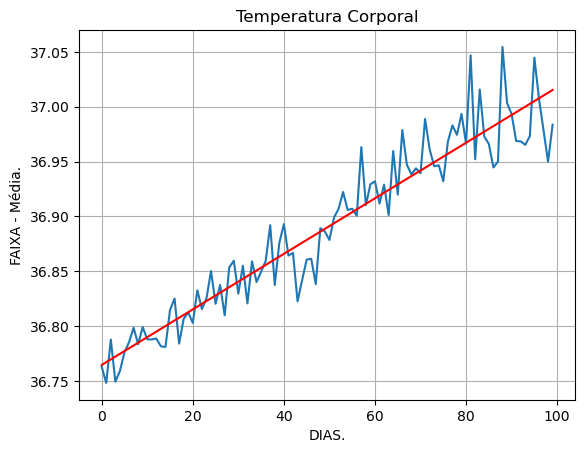

------------------------------------------------
	Histograma - Temperatura Corporal


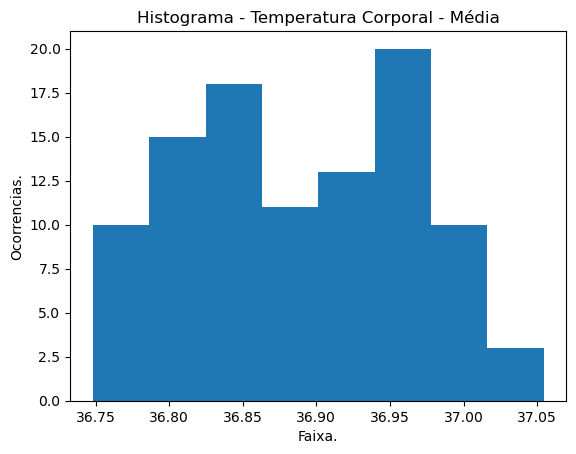



	*************** Opções de sair.  ***************
	**	Deseja continuar?
	**	S - SIM, N - NÃO? n
	***** ************************************ *****


In [43]:
## Criando a lista, com os dias.
## Utilizado para obter o perfil da curva.
dia = 100
dias = []
for i in range(dia): dias.append(i)


while True:
    try:
        print("\n\n\t*************** Menu de opções  ***************")
        opcao_p = int(input("\n\t**\t1 - Batimento.\n\t**\t2 - Pressão\n\t**\t3 - Temperatura\n\n\t**\tQual sua opção? "))
        print("\n\n\t***************")
        opcao_e = int(input("\n\t**\t1 - Média.\n\t**\t2 - Mediana\n\t**\t3 - Desvio Padrão.\n\t**\t4 - Variancia.\n\t**\t5 - Valor Minimo\n\t**\t6 - Valor Maximo\n\t**\t7 - Amplitude.\n\n\t**\tQual sua opção? "))
        
        
    except ValueError:
        print("\t**\tERRO - Valor fora do padrão, digite um valor número inteiro.")
    
    if(((opcao_p > 0) and (opcao_p <=3)) and ((opcao_e > 0) and (opcao_e <= 7))):
        print("\t***** *************************************** *****\n")
    
        print(f"\t{EXPLORADOS[opcao_e-1]} de {PARAMETROS[opcao_p-1]} por {dia} dias.")
        plt.plot(dias, dados_extraidos[opcao_p-1][opcao_e-1])
        plt.title(f"{PARAMETROS[opcao_p-1]}")
        plt.xlabel("DIAS.")
        plt.ylabel(f"FAIXA - {EXPLORADOS[opcao_e-1]}.")

        """
            Essa etapa faz a
            avaliação do perfil da curva.
            Foi criado um metodo distribuirNaMatriz(X[..])
            Onde é enviado uma lista com os valores
            e retorna matriz com os valores em cada lista.
        """
        regressao=linear_model.LinearRegression()
        horas_d = np.array(distribuirNaMatriz(dias))
        valores =np.array(distribuirNaMatriz(dados_extraidos[opcao_p-1][opcao_e-1]))
        regressao.fit(horas_d,valores)
        plt.plot(horas_d, horas_d*regressao.coef_[0][0] + regressao.intercept_, color='red')
        
        # incluindo grades no grafico.
        plt.grid()
        plt.show()
        print("------------------------------------------------")
        print(f"\tHistograma - {PARAMETROS[opcao_p-1]}")
        # Histograma.
        hist=np.histogram(dados_extraidos[opcao_p-1][opcao_e-1])
        # Plotar dados.
        plt.hist(dados_extraidos[opcao_p-1][opcao_e-1],bins='auto')
        plt.title(f"Histograma - {PARAMETROS[opcao_p-1]} - {EXPLORADOS[opcao_e-1]}")
        plt.xlabel("Faixa.")
        plt.ylabel("Ocorrencias.")
        plt.show()

        print("\n\n\t*************** Opções de sair.  ***************")
        opcao_p = input("\t**\tDeseja continuar?\n\t**\tS - SIM, N - NÃO? ")
        print("\t***** ************************************ *****")
        
        # Se opação for igual "N" Não.Então
        # irá parar o loop do while.
        if((opcao_p == "N") or (opcao_p == "n")):
            break
            
    else:
        print("\t**\tOPÇÃO INVÁLIDA. TENTE NOVAMENTE!")

## Verificando se o registro diário está abaixo ou acima. Exibindo uma mensagem.
### Apenas Para a Média e Mediana.
#### Enquanto for Verdadeiro irá executar. 

In [52]:
while True:
    try:
        print("\n\n\t*************** Menu de opções  ***************")
        opcao_p = int(input("\n\t**\t1 - Batimento.\n\t**\t2 - Pressão\n\t**\t3 - Temperatura\n\n\t**\tQual sua opção? "))
        print("\n\n\t***************")
        opcao_e = int(input("\n\t**\t1 - Média.\n\t**\t2 - Mediana.\n\n\t**\tQual sua opção? "))
        
        
    except ValueError:
        print("\t**\tERRO - Valor fora do padrão, digite um valor número inteiro.")
    
    if(((opcao_p > 0) and (opcao_p <=3)) and ((opcao_e > 0) and (opcao_e <= 7))):
        print("\n***** *************************************** *****\n")
        
        """
        Laço que percorre a matriz com os 100 dias de batimento cariaco.
        Onde i é a lista com 24 registros do batimento.
        """
        dia = 0
        p = opcao_p-1
        v = opcao_e-1
        for i in matriz_master[p]:
            print(f"\n\n-- --- -- {dia+1}º Dia\n")

            hora = 0
            acima = 0
            abaixo = 0
            """
            Laço que percorre a lista com os 24 registros.
            """
            for x in i:

                # Se valor é igual a média, ou igula a mediana.
                if((v == 0) or (v == 1)):
                    if(x > dados_extraidos[p][v][dia]):
                        print(f"\t\t{hora+1}h - {x} - {PARAMETROS[p]} acima da {EXPLORADOS[v]}.")
                        print(f"\t\t\t Alerta!!! Acima d. {PARAMETROS[p]} diária.\n")
                        acima += 1
                    elif(x < dados_extraidos[p][v][dia]):
                        print(f"\t\t{hora+1}h - {x} - {PARAMETROS[p]} a baixo da {EXPLORADOS[v]}.")
                        abaixo += 1
                    else:
                        print(f"\t\t{hora+1}h - {x} - {PARAMETROS[p]} na {EXPLORADOS[v]}.")
                    hora += 1
                else:
                    print("Contruir condição...")

            print(f"\t\t\tQtd acima: {acima} da {EXPLORADOS[v]} - Qtd abaixo: {abaixo} da {EXPLORADOS[v]}.")

            dia += 1

        print("\n\n\t*************** Opções de sair.  ***************")
        opcao_p = input("\t**\tDeseja continuar?\n\t**\tS - SIM, N - NÃO? ")
        print("\t***** ************************************ *****")
        
        # Se opação for igual "N" Não.Então
        # irá parar o loop do while.
        if((opcao_p == "N") or (opcao_p == "n")):
            break
    else:
        print("\t**\tOPÇÃO INVÁLIDA. TENTE NOVAMENTE!")



	*************** Menu de opções  ***************

	**	1 - Batimento.
	**	2 - Pressão
	**	3 - Temperatura

	**	Qual sua opção? 1


	***************

	**	1 - Média.
	**	2 - Mediana.

	**	Qual sua opção? 1

***** *************************************** *****



-- --- -- 1º Dia

		1h - 66.53589838486225 - Batimento Cardiaco a baixo da Média.
		2h - 66.93582222752408 - Batimento Cardiaco a baixo da Média.
		3h - 67.42884956125384 - Batimento Cardiaco a baixo da Média.
		4h - 68.0 - Batimento Cardiaco a baixo da Média.
		5h - 68.63191942669732 - Batimento Cardiaco a baixo da Média.
		6h - 69.30540728933228 - Batimento Cardiaco a baixo da Média.
		7h - 70.0 - Batimento Cardiaco a baixo da Média.
		8h - 70.69459271066772 - Batimento Cardiaco a baixo da Média.
		9h - 71.36808057330268 - Batimento Cardiaco acima da Média.
			 Alerta!!! Acima d. Batimento Cardiaco diária.

		10h - 72.0 - Batimento Cardiaco acima da Média.
			 Alerta!!! Acima d. Batimento Cardiaco diária.

		11h - 72.5711504387

	**	Deseja continuar?
	**	S - SIM, N - NÃO? n
	***** ************************************ *****
